#              EDA - project 1 

              Edouard Toutounji - january 10, 2020
 
  
  
   


Content:
- I    Loading the libraries and the 3 files into their dataframes
- II   Understanding the 3 dataframes using info() and describe() methods
- III  Univariate plots for the attributes : Age, Gender, Occupation , Release Date, Rating
- IV   Genres popularity over the years
- V    Top 25 movies with more than 100 ratings
- VI   Gender Comparison


## I- Loading the libraries and the 3 files into their dataframes

In [2]:
# Loading the necesseray libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# All the files and the jupyter notebook are on my desktop


**IMPORTANT: The UserID and MovieID columns syntaxes were UNIFIED**

In [3]:
# Importing the 'u.data' file into dataframe 'ratings'

ratings  = pd.read_csv('u.data', sep = '\t', names= "UserId  MovieId  Rating  Timestamp".split())
ratings.head()


,UserId,MovieId,Rating,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
# Importing the 'u.item' file into dataframe 'movies'

col_n = ['MovieId' , 'Movie title' , 'Release date' , 'Video release date',"IMDb URL" , 
         'Unknown' , 'Action' , 'Adventure' , 'Animation' ,"Children's" , 'Comedy' , 'Crime' , 
         'Documentary' , 'Drama' , 'Fantasy' ,'Film-Noir', 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 
         'Sci-Fi' ,'Thriller', 'War' , 'Western']

movies = pd.read_csv('u.item',sep = '|',encoding='latin-1',names=col_n)
movies.head()

,MovieId,Movie title,Release date,Video release date,IMDb URL,Unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
# Importing the 'u.user' file into dataframe 'users'

users  = pd.read_csv('u.user', sep = '|', names= "UserId  Age Gender Occupation  Zipcode".split())
users.head()

,UserId,Age,Gender,Occupation,Zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213



## II - Understanding the 3 dataframes 

**2.1 Undestanding the 'users' dataframe**

In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
UserId        943 non-null int64
Age           943 non-null int64
Gender        943 non-null object
Occupation    943 non-null object
Zipcode       943 non-null object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [7]:
users.describe()

,UserId,Age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


**2.2 Undestanding the 'movies' dataframe**

In [8]:
# Aside two columns ['Release date', 'ImDb URL'] , there are no missing values.
# The column ['Video release date'] is just empty .

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
MovieId               1682 non-null int64
Movie title           1682 non-null object
Release date          1681 non-null object
Video release date    0 non-null float64
IMDb URL              1679 non-null object
Unknown               1682 non-null int64
Action                1682 non-null int64
Adventure             1682 non-null int64
Animation             1682 non-null int64
Children's            1682 non-null int64
Comedy                1682 non-null int64
Crime                 1682 non-null int64
Documentary           1682 non-null int64
Drama                 1682 non-null int64
Fantasy               1682 non-null int64
Film-Noir             1682 non-null int64
Horror                1682 non-null int64
Musical               1682 non-null int64
Mystery               1682 non-null int64
Romance               1682 non-null int64
Sci-Fi                1682 non-null int64
Thriller 

In [9]:
movies['Release date']


0       01-Jan-1995
1       01-Jan-1995
2       01-Jan-1995
3       01-Jan-1995
4       01-Jan-1995
           ...     
1677    06-Feb-1998
1678    06-Feb-1998
1679    01-Jan-1998
1680    01-Jan-1994
1681    08-Mar-1996
Name: Release date, Length: 1682, dtype: object

**2.3 Undestanding the 'ratings' dataframe**

In [10]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
UserId       100000 non-null int64
MovieId      100000 non-null int64
Rating       100000 non-null int64
Timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [11]:
ratings.describe()

,UserId,MovieId,Rating,Timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08



## III - Univariate plots for the attributes 

- 'Age'
- 'Gender'
- 'Occupation'

- 'Release date'
- 'Rating'

**3.1 Age Distribution**

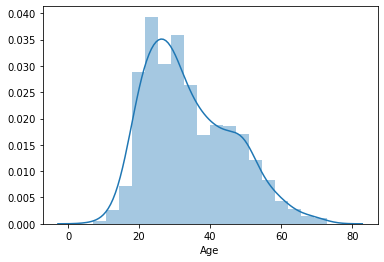

34.05196182396607

In [12]:
sns.distplot(users['Age'])
plt.show()
users['Age'].mean()

**3.2 Gender Distribution**

In [13]:
users['Gender'].value_counts()

M    670
F    273
Name: Gender, dtype: int64

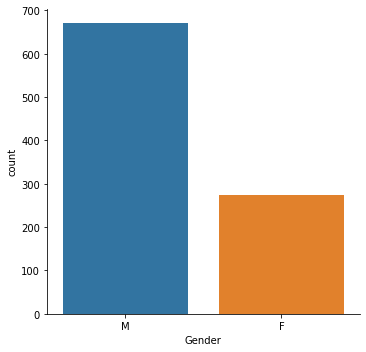

In [14]:
sns.catplot(x="Gender", kind="count", data=users)
plt.show()

**3.3 Occupation Distribution**

In [15]:
users['Occupation'].value_counts()

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: Occupation, dtype: int64

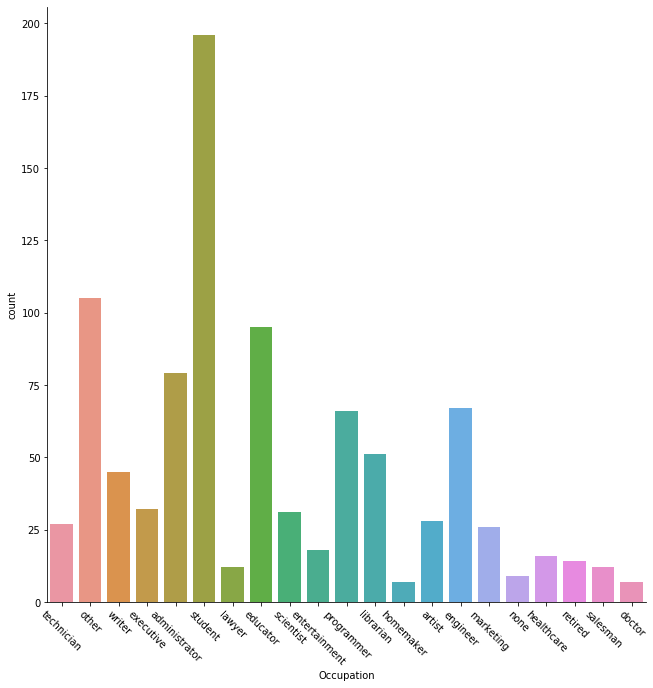

In [21]:
sns.catplot(x="Occupation", kind="count", data=users, height=9, aspect=1)
plt.xticks(rotation=-45)
plt.show()

**3.4 Rating Dstribution**

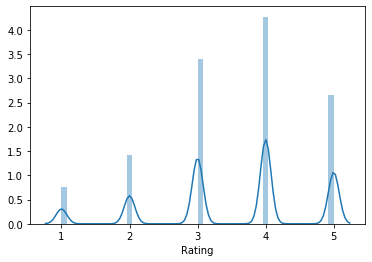

3.52986

In [17]:
sns.distplot(ratings["Rating"])
plt.show()
ratings["Rating"].mean()

**3.5 Release Date Dstribution**

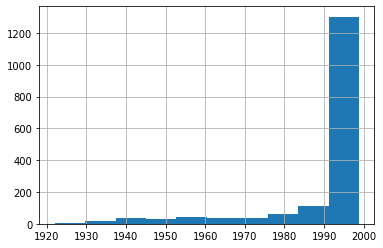

In [192]:
pd.to_datetime(movies['Release date']).sort_values().hist()
plt.show()


## IV - Genres popularity over the years

In [93]:
# merging the dataframes 'movies' and ' ratings'
DF= pd.merge(movies,ratings,on='MovieId')


# tranform the 'Release date' column to a datetime format so I can reorder it
DF['Date'] = pd.to_datetime(DF['Release date'])
Time_sorted_DF = DF.sort_values(by='Date')


                            

In [194]:
# checking 'Date' column was added at the end
Time_sorted_DF.head(2)

,MovieId,Movie title,Release date,Video release date,IMDb URL,Unknown,Action,Adventure,Animation,Children's,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,UserId,Rating,Timestamp,Date
77974,675,"Nosferatu (Nosferatu, eine Symphonie des Graue...",01-Jan-1922,NaN,"http://us.imdb.com/M/title-exact?Nosferatu,%20...",0,0,0,0,0,...,0,0,0,0,0,0,846,2,883949379,1922-01-01
77947,675,"Nosferatu (Nosferatu, eine Symphonie des Graue...",01-Jan-1922,NaN,"http://us.imdb.com/M/title-exact?Nosferatu,%20...",0,0,0,0,0,...,0,0,0,0,0,0,21,5,874951897,1922-01-01


## Creating time aranged count  Series per Genre, so we can plot them later on in one graph

In [96]:
Time_sorted_DF.columns

Index(['MovieId', 'Movie title', 'Release date', 'Video release date',
       'IMDb URL', 'Unknown', 'Action', 'Adventure', 'Animation', 'Children's',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western', 'UserId', 'Rating', 'Timestamp', 'Date'],
      dtype='object')

In [173]:
# Creating list per genre counts of released movies  over time

Unknown_Time     = Time_sorted_DF.groupby('Date')['Unknown'].sum()
Action_Time      = Time_sorted_DF.groupby('Date')['Action'].sum()
Adventure_Time   = Time_sorted_DF.groupby('Date')['Adventure'].sum()
Animation_Time   = Time_sorted_DF.groupby('Date')['Animation'].sum()
Children_Time    = Time_sorted_DF.groupby('Date')["Children's"].sum()
Comedy_Time      = Time_sorted_DF.groupby('Date')['Comedy'].sum()
Crime_Time       = Time_sorted_DF.groupby('Date')['Crime'].sum()
Documentary_Time = Time_sorted_DF.groupby('Date')['Documentary'].sum()
Drama_Time       = Time_sorted_DF.groupby('Date')['Drama'].sum()
Fantasy_Time     = Time_sorted_DF.groupby('Date')['Fantasy'].sum()
FilmNoir_Time    = Time_sorted_DF.groupby('Date')['Film-Noir'].sum()
Horror_Time      = Time_sorted_DF.groupby('Date')['Horror'].sum()
Musical_Time     = Time_sorted_DF.groupby('Date')['Musical'].sum()
Mystery_Time     = Time_sorted_DF.groupby('Date')['Mystery'].sum()
Romance_Time     = Time_sorted_DF.groupby('Date')['Romance'].sum()
SciFi_Time       = Time_sorted_DF.groupby('Date')['Sci-Fi'].sum()
Thriller_Time    = Time_sorted_DF.groupby('Date')['Thriller'].sum()
War_Time         = Time_sorted_DF.groupby('Date')['War'].sum()
Western_Time     = Time_sorted_DF.groupby('Date')['Western'].sum()


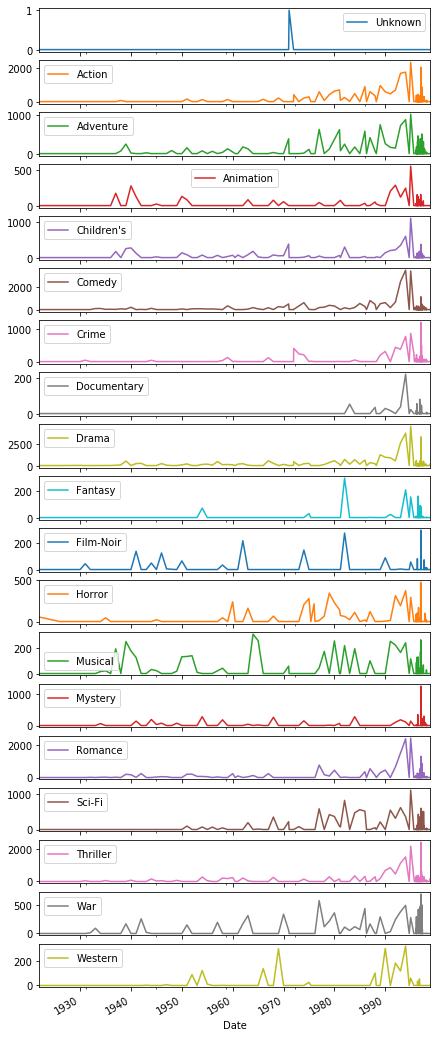

In [193]:
DF_polpularity_Time = pd.concat(
                      [Unknown_Time,   Action_Time,      Adventure_Time,
                       Animation_Time, Children_Time,    Comedy_Time, 
                       Crime_Time,     Documentary_Time, Drama_Time,
                       Fantasy_Time,   FilmNoir_Time,    Horror_Time,
                       Musical_Time,   Mystery_Time,     Romance_Time,
                       SciFi_Time,     Thriller_Time,    War_Time,    Western_Time  ], axis=1)



DF_polpularity_Time.plot(subplots=True, figsize=(7,20))
plt.show()

# V - Top 25 movies with more than 100 ratings 

In [247]:
DF_Ratings= Time_sorted_DF.groupby('Movie title').size()

In [248]:
DF_Ratings[DF_Ratings>100].sort_values(ascending=False)[:25]

Movie title
Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Back to 

# VI - Gender Comparison

In [249]:
# Merge all three original dataframes 

DF1= pd.merge(movies,ratings,on='MovieId')
DF2= pd.merge(DF1,users, on = 'UserId')

In [250]:
# Females gave higher Rating for Drama on average

pivoted = DF2.pivot_table(index=["Drama"],
                           columns=['Gender'],
                           values='Rating',
                           fill_value=0)
pivoted.head()

Gender,F,M
Drama,,
0,3.433818,3.422542
1,3.662246,3.696957


In [243]:
# Females gave higher Rating for Romance on average

pivoted = DF2.pivot_table(index=["Romance"],
                           columns=['Gender'],
                           values='Rating',
                           fill_value=0)
pivoted.head()

Gender,F,M
Romance,,
0,3.494920,3.511845
1,3.655685,3.607072


In [245]:
# Males gave higher Rating for Sci-Fi on average

pivoted = DF2.pivot_table(index=["Sci-Fi"],
                           columns=['Gender'],
                           values='Rating',
                           fill_value=0)
pivoted.head()

Gender,F,M
Sci-Fi,,
0,3.535329,3.521766
1,3.497908,3.577072




**NOTE : 
We did not learn about pivot of tables - the above 3 snippets were from  websites that did similar analysis and I tried to adapt it.**

I hope subsequent projects are better guided with smaller chuncked steps to guide us through mastery.
Thanks.